In [1]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si
from mpl_toolkits import mplot3d
import progressbar

In [3]:
def err(x, y):
    errv = np.empty(len(x))
    for i in range(len(x)):
        errv[i] = max(errv[i-1] if i > 0 else 0, np.abs(x[i]-y[i]))
    return errv

def omega(t,e):
    o=((1 - e**2/16. + (17*e**4)/3072. + t**2/24. + (27*e**2*t**2)/128. +
    (781*e**4*t**2)/73728. + (3*t**4)/640. + (149*e**2*t**4)/2048. -
    (339041*e**4*t**4)/3.538944e6 + (5*t**6)/7168. + (559*e**2*t**6)/16384. +
    (4695149*e**4*t**6)/8.4934656e7))/(2*np.pi)
    return o

## Forced Van Der Pol Oscillator

Forced Van der Pol Oscillator from: "Explicit methods in extended phase space for inseparable Hamiltonian problems", 
doi:10.1007/s10569-014-9597-9
$f(q) = - \epsilon (1-q^2)$ and $F(q,t) = q - A \cos(\frac{2 \pi t}{P})$.
Simulations parameters:

$\tau = 0.02$

$t_f = 500$

$\mu = 5$

$A = 5$

$P=\frac{2 \pi}{2.463}$

In [4]:
from scipy import integrate as si

def err(x, y):
    errv = np.empty(len(x))
    for i in range(len(x)):
        errv[i] = max(errv[i-1] if i > 0 else 0, abs(x[i]-y[i]))
    return errv

In [5]:
def ivp_vdp(y, t, mu, a, omega):
    return [
        y[1],
        mu*(1-y[0]**2)*y[1] - y[0] + a*np.cos(omega*t)
    ]

# dt = 0.02
tspan = np.arange(0, 500, 0.02)

y_init, params = [2, 2], (5, 5, 2.463)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
print("Number of function evaluations: %d, number of Jacobian evaluations: %d" % (info['nfe'][-1], info['nje'][-1]))

Number of function evaluations: 478504, number of Jacobian evaluations: 9985


In [6]:
vdp = lm.VanDerPol(5, 5, 2.463)
tspan = np.arange(0, 500, 0.02)

q0, p0, s0 = 2, 0, 2

sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
solm, solms, _ = ic.integrate(step6, vdp, tspan, p0, q0, s0)
sol1, sol1s, _ = ic.integrate(step6e, vdp, tspan, p0, q0, s0)

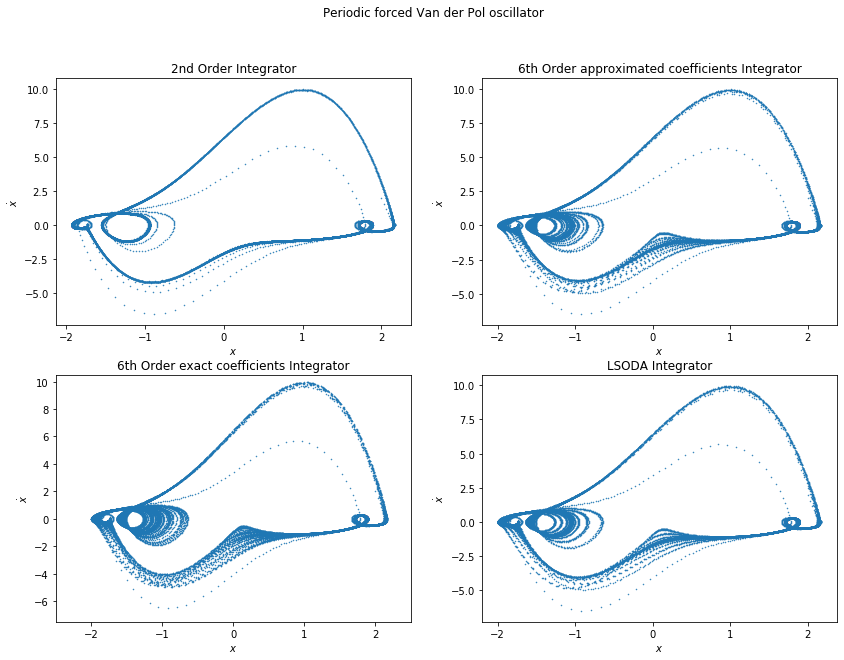

In [7]:
plt.figure(figsize=(14,10))

plt.suptitle("Periodic forced Van der Pol oscillator")
plt.subplot(221)
plt.gca().set_title("2nd Order Integrator")
plt.plot(sol[:,1], sols, '.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.subplot(222)
plt.gca().set_title("6th Order approximated coefficients Integrator")
plt.plot(solm[:,1], solms,'.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.subplot(223)
plt.gca().set_title("6th Order exact coefficients Integrator")
plt.plot(sol1[:,1], sol1s,'.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")
plt.xlim((-2.5,2.5))
plt.ylim((-7.5,10.5))

plt.subplot(224)
plt.gca().set_title("LSODA Integrator")
plt.plot(y_odeint[:, 0], y_odeint[:, 1], '.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.show()

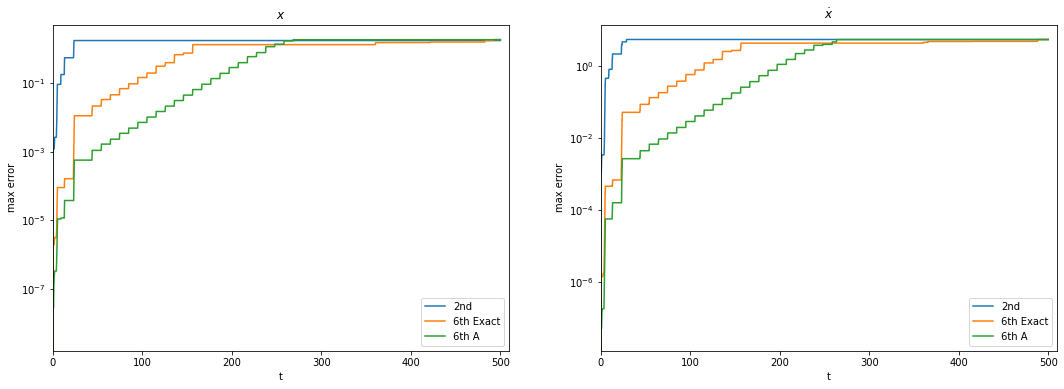

In [8]:
plt.figure(figsize=(18,6))

cut = 0
plt.subplot("121")
plt.title("$x$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(sol[:,1],y_odeint[:,0]),label='2nd')
plt.plot(tspan,
         err(sol1[:,1],y_odeint[:,0]),label='6th Exact')
plt.plot(tspan,
         err(solm[:,1],y_odeint[:,0]),label='6th A')
plt.yscale('log')
plt.xlim(0,510)
plt.legend(loc='lower right')

plt.subplot("122")
plt.title("$\dot{x}$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(sols,y_odeint[:,1]),label="2nd")
plt.plot(tspan,
         err(sol1s,y_odeint[:,1]),label="6th Exact")
plt.plot(tspan,
         err(solms,y_odeint[:,1]),label="6th A")
plt.yscale('log')
plt.xlim(0,510)
plt.legend(loc='lower right')

plt.show()